<center><h1>Payapulli_Joshua_HW3</h1></center>
<br>
<br>

Name: Joshua Payapulli
<br>
Github Username: Payapulli
<br>
USC ID: 3751786221

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import os
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from prettytable import PrettyTable
import matplotlib.pyplot as plt

Get the AReM Data Set

In [2]:
# Data Cleaning: we know that cycling/dataset9.csv and cycling/dataset14.csv has 
# trailing commas that need to be stripped
# bending2/dataset4.csv needs to be changed from using spaces as the delimeter to commas so it is standardized
folders_to_clean = ['../data/AReM/cycling/dataset9.csv', '../data/AReM/cycling/dataset14.csv', '../data/AReM/bending2/dataset4.csv']

for folder in folders_to_clean:
    with open(folder, 'r') as file:
        lines = file.readlines()

    if 'bending2' in folder:
        # Do not remove spaces from the first 4 lines
        headers = lines[:4]
        # standardize delimeter to comma
        headers.extend([','.join(line.split()) + '\n' for line in lines[4:]])
    else:
        # remove trailing commas, skip first 4 rows again
        cleaned_lines = [line.rstrip(',\n') + '\n' for line in lines]

    # Rewrite file with cleaned data
    with open(folder, 'w') as file:
        file.writelines(cleaned_lines)

In [3]:
df = []
instance = 1
# loop through each folder in AReM Data Set
for folder in os.listdir('../data/AReM/'):
    folder_path = os.path.join('../data/AReM/', folder)
    
    # loop through the files in each folder
    if os.path.isdir(folder_path):
        
        # For the bending1 and bending2 folders we only want the first two
        # datasets in test
        if 'bending1' in folder or 'bending2' in folder:
            test_datasets = ['dataset1.csv', 'dataset2.csv']
        else:
            test_datasets = ['dataset1.csv', 'dataset2.csv', 'dataset3.csv']
        
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)

            # check we have a csv file
            if os.path.isfile(file_path) and file_path.endswith('.csv'):
                try:
                    curr_df = pd.read_csv(file_path, skiprows=4)
                    
                    # Assign the 'test' or 'train' label based on the file name
                    curr_df['data_split'] = 'test' if file in test_datasets else 'train'
                    curr_df['instance'] = instance
                    instance += 1
                    df.append(curr_df)
                except pd.errors.ParserError as e:
                    print(f"Error parsing {file_path}. Error: {e}")

# convert into pandas DataFrame
df = pd.concat(df, ignore_index=True)
df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,data_split,instance
0,0,42.00,0.00,18.50,0.50,12.00,0.00,train,1
1,250,42.00,0.00,18.00,0.00,11.33,0.94,train,1
2,500,42.75,0.43,16.75,1.79,18.25,0.43,train,1
3,750,42.50,0.50,16.75,0.83,19.00,1.22,train,1
4,1000,43.00,0.82,16.25,0.83,18.00,0.00,train,1
...,...,...,...,...,...,...,...,...,...
42234,118750,41.75,1.79,11.00,6.00,16.67,2.49,train,88
42235,119000,36.33,0.47,16.00,3.16,20.33,1.70,train,88
42236,119250,31.50,1.50,21.00,0.00,12.25,7.12,train,88
42237,119500,34.25,6.38,12.67,2.49,15.25,4.21,train,88


### (b) Test and Train Data

In [4]:
# display training data
train_df = df[df['data_split'] == 'train']
print("Train Data")
# skip labels for instance and test split as these are not important now
train_df.iloc[:, :7]

Train Data


,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,42.00,0.00,18.50,0.50,12.00,0.00
1,250,42.00,0.00,18.00,0.00,11.33,0.94
2,500,42.75,0.43,16.75,1.79,18.25,0.43
3,750,42.50,0.50,16.75,0.83,19.00,1.22
4,1000,43.00,0.82,16.25,0.83,18.00,0.00
...,...,...,...,...,...,...,...
42234,118750,41.75,1.79,11.00,6.00,16.67,2.49
42235,119000,36.33,0.47,16.00,3.16,20.33,1.70
42236,119250,31.50,1.50,21.00,0.00,12.25,7.12
42237,119500,34.25,6.38,12.67,2.49,15.25,4.21


In [5]:
# Display test data
test_df = df[df['data_split'] == 'test']
print("Test Data")
# skip labels for instance and test split as these are not important now
test_df.iloc[:, :7]

Test Data


,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
1920,0,39.25,0.43,22.75,0.43,33.75,1.30
1921,250,39.25,0.43,23.00,0.00,33.00,0.00
1922,500,39.25,0.43,23.25,0.43,33.00,0.00
1923,750,39.50,0.50,23.00,0.71,33.00,0.00
1924,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...
38394,118750,36.50,1.50,15.67,9.74,20.50,2.87
38395,119000,36.00,0.00,23.25,1.30,17.00,1.63
38396,119250,32.33,5.56,15.33,3.77,14.50,4.82
38397,119500,32.00,5.87,12.25,2.17,14.50,2.87


### (c) Feature Extraction

#### i. Research

- Mean, Median, Mode
- Standard Deviation, Mean Absolute Deviation, Variance
- Minimum, Maximum, Range, First Quartile, Third Quartile, Interquartile Range
- Skewness, Kurtosis
- Autocorrelation, Cross-Correlation
- Zero Crossing Rate
- Signal Magnitude Area
- Slope
- Rolling Average, Rolling Standard Deviation (within a moving window)
- Sample Entropy, Approximate Entropy
- Trend Component, Seasonal Component

#### ii. Extraction

In [6]:
def extract_features(df):
    features = []
    for instance, group in df.groupby('instance'):
        instance_features = {'instance': instance}
        time_series = 1
        for col in group.columns:
            # skip these columns
            if 'time' not in col and 'instance' not in col and 'data_split' not in col:
                temp_series = group[col]
                instance_features[f'min_{time_series}'] = temp_series.min()
                instance_features[f'max_{time_series}'] = temp_series.max()
                instance_features[f'mean_{time_series}'] = temp_series.mean()
                instance_features[f'median_{time_series}'] = temp_series.median()
                instance_features[f'std_{time_series}'] = temp_series.std()
                instance_features[f'1st_quart_{time_series}'] = temp_series.quantile(0.25)
                instance_features[f'3rd_quart_{time_series}'] = temp_series.quantile(0.75)
                time_series += 1
        features.append(instance_features)
    features_df = pd.DataFrame(features)
    return features_df

features_df = extract_features(df)
# skip first col as this is repeated
features_df.iloc[:, 1:]

,min_1,max_1,mean_1,median_1,std_1,1st_quart_1,3rd_quart_1,min_2,max_2,mean_2,...,std_5,1st_quart_5,3rd_quart_5,min_6,max_6,mean_6,median_6,std_6,1st_quart_6,3rd_quart_6
0,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555312,0.490,0.487826,0.0000,0.8300
1,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
2,33.00,47.75,42.179812,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
3,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
4,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
84,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
85,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175
86,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,2.851673,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300


#### iii. Standard Deviation

In [7]:
std_devs = {}

# put results into a table
table = PrettyTable()
table.field_names = ["Feature", "Std Dev", "Lower Bound", "Upper Bound", "Range"]

for feature in features_df.columns:

    # dont want to calculate std dev for instance feature
    if feature == 'instance':
        continue
    
    # Drop NaN values if any so we can calculate lower and upper bound
    series = features_df[feature].dropna()

    # get std_dev estimate
    std_dev = series.std()
    # get 90% CI for the std_dev
    bootstrap_CI = bs.bootstrap(series.values, stat_func=bs_stats.std, alpha=0.1)

    std_devs[feature] = {
        'estimate' : std_dev,
        'lower' : bootstrap_CI.lower_bound,
        'upper' : bootstrap_CI.upper_bound,
        'range' : bootstrap_CI.upper_bound - bootstrap_CI.lower_bound
    }

    table.add_row([feature, f"{std_devs[feature]['estimate']:.2f}", f"{std_devs[feature]['lower']:.2f}", 
                   f"{std_devs[feature]['upper']:.2f}", f"{std_devs[feature]['range']:.2f}"])

print(table)

+-------------+---------+-------------+-------------+-------+
|   Feature   | Std Dev | Lower Bound | Upper Bound | Range |
+-------------+---------+-------------+-------------+-------+
|    min_1    |   9.59  |     8.33    |    10.83    |  2.50 |
|    max_1    |   4.19  |     3.24    |     5.20    |  1.96 |
|    mean_1   |   5.25  |     4.67    |     5.85    |  1.18 |
|   median_1  |   5.36  |     4.77    |     5.98    |  1.21 |
|    std_1    |   1.76  |     1.57    |     1.95    |  0.38 |
| 1st_quart_1 |   6.10  |     5.58    |     6.65    |  1.07 |
| 3rd_quart_1 |   5.01  |     4.29    |     5.79    |  1.50 |
|    min_2    |   0.00  |     0.00    |     0.00    |  0.00 |
|    max_2    |   5.04  |     4.68    |     5.44    |  0.75 |
|    mean_2   |   1.57  |     1.44    |     1.74    |  0.30 |
|   median_2  |   1.41  |     1.27    |     1.57    |  0.30 |
|    std_2    |   0.89  |     0.83    |     0.96    |  0.13 |
| 1st_quart_2 |   0.94  |     0.85    |     1.05    |  0.20 |
| 3rd_qu

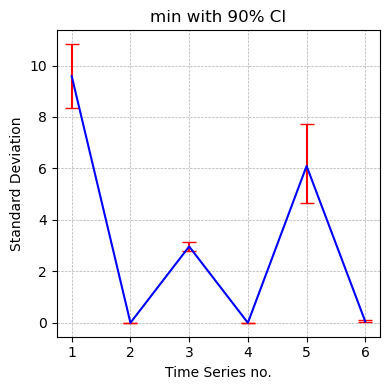

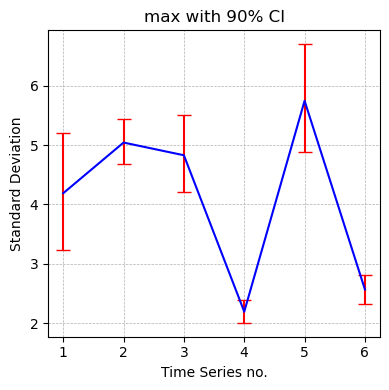

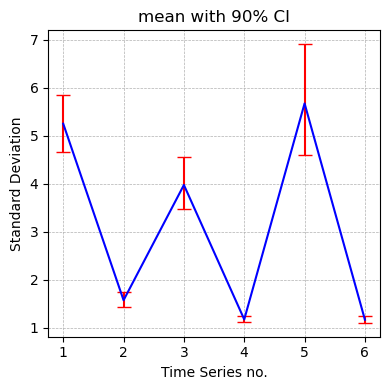

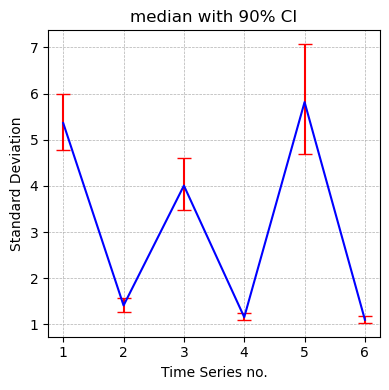

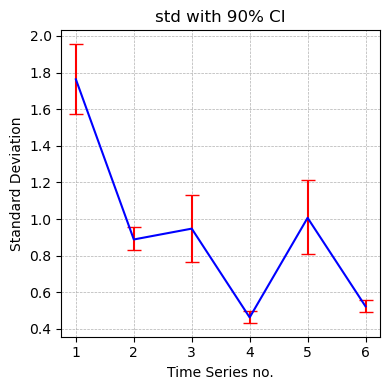

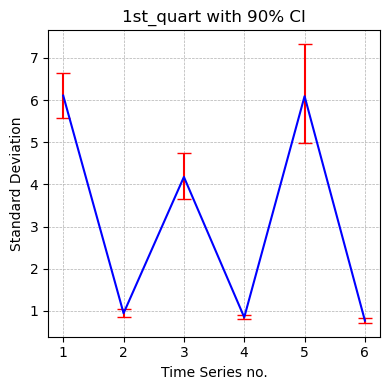

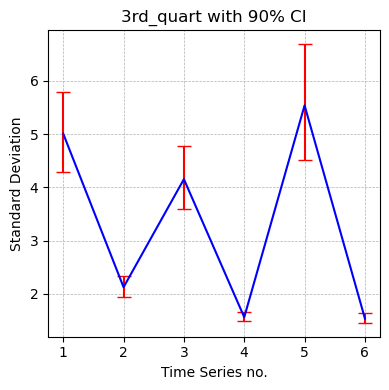

In [8]:
# Plots to visualize the standard deviations of each feature, across the 6 time series
# and the corresponding CI bars.

# Names for labeling
feature_names = ['min', 'max', 'mean', 'median', 'std', '1st_quart', '3rd_quart']

for feature in feature_names:
    estimates = [std_devs[f"{feature}_{i}"]['estimate'] for i in range(1, 7)]
    lower_bounds = [std_devs[f"{feature}_{i}"]['lower'] for i in range(1, 7)]
    upper_bounds = [std_devs[f"{feature}_{i}"]['upper'] for i in range(1, 7)]

    # error bars
    yerrors = [(est - lb, ub - est) for est, lb, ub in zip(estimates, lower_bounds, upper_bounds)]
    yerrors = list(zip(*yerrors))  # This transposes the yerrors to fit the errorbar input format

    # Plotting
    plt.figure(figsize=(4, 4))
    plt.errorbar(range(1, 7), estimates, yerr=yerrors, color='blue', ecolor='red', capsize=5)
    plt.xlabel('Time Series no.')
    plt.ylabel('Standard Deviation')
    plt.title(f'{feature} with 90% CI')
    plt.xticks(range(1, 7))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    

#### iv. Select Features

The criteria I am using to select features is:
- Conceptual - what this feature can tell us from a conceptual standpoint and why this might be useful.
- Std dev estimate - a higher std. dev. means our time series will have higher variability which will help our model to discriminate between classes.
- Confidence interval - we want to have generally higher CIs as this means we have higher variability. A lower CI does technically mean that we are more confident in our estimate of a high std. dev. However, these time series data are not seperated by class and so higher CIs mean that the spread or distribution of our data varies more from class to class, which is what we want for the task of classification.

Mean: 
- Conceptually, the mean captures the average behavior or central tendency of the time series, and so will be useful in drawing distinction between datasets based on their general behavior.
- Empirically, the means contain a good amount of variability, mean_5 has a std. dev. of 5.68 and mean_1 has a value of 5.25. This high variability will help to differentiate between instances and will aid in classification.

Max:
- Conceptually, the maximum values help to give us an understand of the highest point in the time series and will give us an understand of the extreme behavior of the time series. From a conceptual standpoint, min also gives us an understanding of the extreme behavior of the time series, I explain why I choose max over min below.
- Empirically, we can see that the max values also contain a high level of variability, max_5 has a std. dev. of 5.75 and max_2 has a std. dev. of 5.04. We see that from the graphs above that min also has a good amount of variability such as min_1 with a value of 9.59. However, we choose max as its CI bars are significantly higher and the low points in the min graph are very low such as min_2 with a value of 0.00.

3rd quartile:
- Conceptually, the 3rd quartile gives us an understanding of the central location of the top 75% of the data points. This is significant because it helps us understand the distribution's shape, particularly the density and spread of the upper section of the time series. 1st quartile and median also provide a similar conceptual understanding, I explain why I chose 3rd quartile below.
- Empirically, we see good variability in this data with 3rd_quart_5 giving us a value of 5.54 and 3rd_quart_1 giving a value of 5.04. We do not choose 1st quartile and median as the low points for these graphs are generally lower, and the CI bars are generally smaller.

## 2. ISLR 3.7.4

### (a) Linear Train

I expect the cubic regression model to have slightly a slightly lower training RSS. The more noisy the data is, the bigger this difference will be.

The two models will likely have RSS values that are very close, and we would expect the cubic term of the cubic regression model to have a very small coefficient, as the true relationship is linear. However, there is likely to be some noise in the training data and for this reason having the cubic term would allow the cubic regression model to fit the data more closely, despite the fact that its fitting to noise.

### (b) Linear Test

I expect the linear regression model to have a lower test RSS.

As mentioned to in the previous question, the cubic regression model would fit closer to the training data but it would likely be fitting to noise. In other words, I would expect the cubic regression model to be overfit to the training data.

### (c) Not Linear Train

I expect the cubic regression model to have a lower training RSS as it is more flexible than the linear regression model. 

The cubic regression model will be better suited at capturing any non-linearities in the data, which will be present to a greater extent than in part (a) as we are told the true relationship is not linear.

### (d) Not Linear Testing

There is not enough information to tell. 

The cubic regression model will likely be better at capturing non-linearity in the data and as such may have a lower test RSS. However it also may overfit to the training data and not generalize well to the test data giving it a higher test RSS.

## 3. ISLR 3.7.3 - Extra Practice 

## 3. ISLR 3.7.5 - Extra Practice 